<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_cluster_data(y_hat)_add_delta_(1_6)_n250_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition/addition_delta_1.6'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_1.6_n250.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,49.478397,31.875367,82.395914,6.793580,180.543258,175.054608,5.488650
1,0.0,1.0,74.881906,70.006776,92.875836,18.427718,266.192234,249.283901,16.908334
2,0.0,2.0,42.642662,75.697409,55.557111,4.079452,187.976633,183.492562,4.484071
3,0.0,3.0,90.718881,21.541878,53.094816,-17.042875,158.312701,175.471384,-17.158683
4,0.0,4.0,85.402368,70.227312,78.819603,-51.030126,193.419157,245.324370,-51.905213
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,54.523131,95.980734,60.647124,93.585252,314.736242,222.707005,92.029237
249996,999.0,246.0,55.494252,79.776291,59.437658,-4.583323,200.124878,205.952767,-5.827889
249997,999.0,247.0,65.456736,65.205118,71.099706,35.286274,247.047834,214.154240,32.893594
249998,999.0,248.0,74.559827,48.118132,83.452587,6.190666,222.321212,219.525419,2.795792


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3          e           Y  \
rep   index                                                           
0.0   0.0    49.478397  31.875367  82.395914   6.793580  180.543258   
      1.0    74.881906  70.006776  92.875836  18.427718  266.192234   
      2.0    42.642662  75.697409  55.557111   4.079452  187.976633   
      3.0    90.718881  21.541878  53.094816 -17.042875  158.312701   
      4.0    85.402368  70.227312  78.819603 -51.030126  193.419157   
...                ...        ...        ...        ...         ...   
999.0 245.0  54.523131  95.980734  60.647124  93.585252  314.736242   
      246.0  55.494252  79.776291  59.437658  -4.583323  200.124878   
      247.0  65.456736  65.205118  71.099706  35.286274  247.047834   
      248.0  74.559827  48.118132  83.452587   6.190666  222.321212   
      249.0  45.600222  24.522540  78.851412 -12.140731  146.833442   

                  y_hat      e_hat  
rep   index                         
0.0   0.0    175.054608   5.488650  
      1.0    249.283901  16.908334  
      2.0    183.492562   4.484071  
      3.0    175.471384 -17.158683  
      4.0    245.324370 -51.905213  
...                 ...        ...  
999.0 245.0  222.707005  92.029237  
      246.0  205.952767  -5.827889  
      247.0  214.154240  32.893594  
      248.0  219.525419   2.795792  
      249.0  158.202408 -11.368966  

[250000 rows x 7 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3          e           Y  \
rep   index                                                           
0.0   0.0    49.478397  31.875367  82.395914   6.793580  180.543258   
      1.0    74.881906  70.006776  92.875836  18.427718  266.192234   
      2.0    42.642662  75.697409  55.557111   4.079452  187.976633   
      3.0    90.718881  21.541878  53.094816 -17.042875  158.312701   
      4.0    85.402368  70.227312  78.819603 -51.030126  193.419157   
...                ...        ...        ...        ...         ...   
999.0 245.0  54.523131  95.980734  60.647124  93.585252  314.736242   
      246.0  55.494252  79.776291  59.437658  -4.583323  200.124878   
      247.0  65.456736  65.205118  71.099706  35.286274  247.047834   
      248.0  74.559827  48.118132  83.452587   6.190666  222.321212   
      249.0  45.600222  24.522540  78.851412 -12.140731  146.833442   

                  y_hat      e_hat  
rep   index                         
0.0   0.0    175.054608   5.488650  
      1.0    249.283901  16.908334  
      2.0    183.492562   4.484071  
      3.0    175.471384 -17.158683  
      4.0    245.324370 -51.905213  
...                 ...        ...  
999.0 245.0  222.707005  92.029237  
      246.0  205.952767  -5.827889  
      247.0  214.154240  32.893594  
      248.0  219.525419   2.795792  
      249.0  158.202408 -11.368966  

[250000 rows x 7 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,49.478397,31.875367,82.395914,6.793580,180.543258,175.054608,5.488650
1,0.0,1.0,74.881906,70.006776,92.875836,18.427718,266.192234,249.283901,16.908334
2,0.0,2.0,42.642662,75.697409,55.557111,4.079452,187.976633,183.492562,4.484071
3,0.0,3.0,90.718881,21.541878,53.094816,-17.042875,158.312701,175.471384,-17.158683
4,0.0,4.0,85.402368,70.227312,78.819603,-51.030126,193.419157,245.324370,-51.905213
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,54.523131,95.980734,60.647124,93.585252,314.736242,222.707005,92.029237
249996,999.0,246.0,55.494252,79.776291,59.437658,-4.583323,200.124878,205.952767,-5.827889
249997,999.0,247.0,65.456736,65.205118,71.099706,35.286274,247.047834,214.154240,32.893594
249998,999.0,248.0,74.559827,48.118132,83.452587,6.190666,222.321212,219.525419,2.795792


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3          e           Y  \
rep   index                                                           
0.0   0.0    49.478397  31.875367  82.395914   6.793580  180.543258   
      1.0    74.881906  70.006776  92.875836  18.427718  266.192234   
      2.0    42.642662  75.697409  55.557111   4.079452  187.976633   
      3.0    90.718881  21.541878  53.094816 -17.042875  158.312701   
      4.0    85.402368  70.227312  78.819603 -51.030126  193.419157   
...                ...        ...        ...        ...         ...   
999.0 245.0  54.523131  95.980734  60.647124  93.585252  314.736242   
      246.0  55.494252  79.776291  59.437658  -4.583323  200.124878   
      247.0  65.456736  65.205118  71.099706  35.286274  247.047834   
      248.0  74.559827  48.118132  83.452587   6.190666  222.321212   
      249.0  45.600222  24.522540  78.851412 -12.140731  146.833442   

                  y_hat      e_hat  
rep   index                         
0.0   0.0    175.054608   5.488650  
      1.0    249.283901  16.908334  
      2.0    183.492562   4.484071  
      3.0    175.471384 -17.158683  
      4.0    245.324370 -51.905213  
...                 ...        ...  
999.0 245.0  222.707005  92.029237  
      246.0  205.952767  -5.827889  
      247.0  214.154240  32.893594  
      248.0  219.525419   2.795792  
      249.0  158.202408 -11.368966  

[250000 rows x 7 columns]

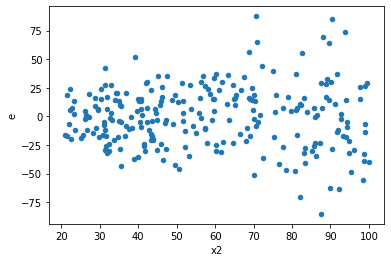

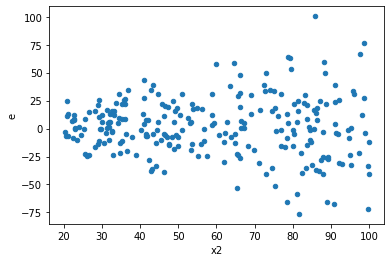

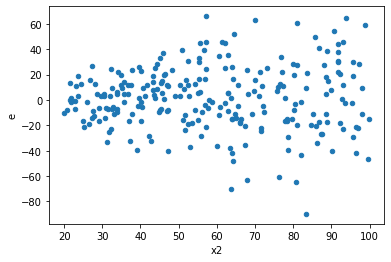

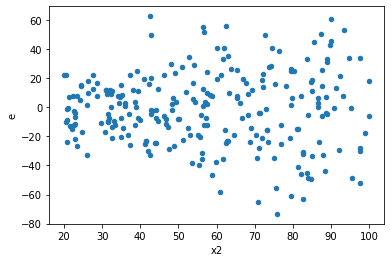

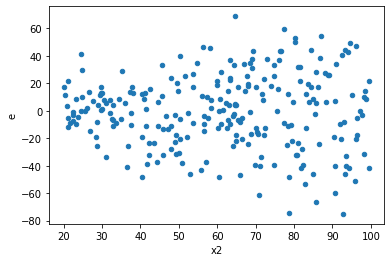

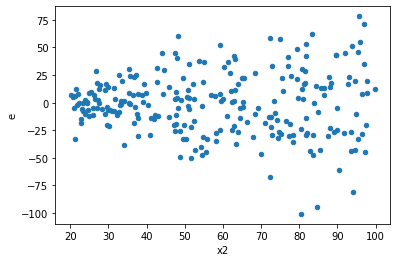

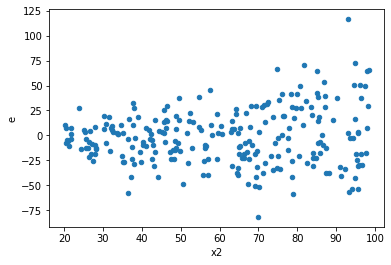

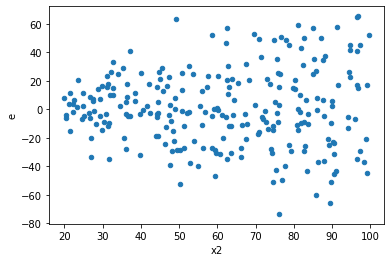

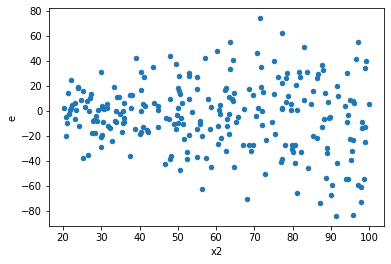

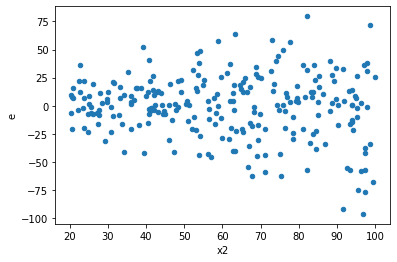

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
1.0,133.0,111.0,67366.01987529936,95423.76505108038,506.5114276338298,859.6735590187421,1.697244153078067,0.004245951010281468,0.9978770244948593,0.002122975505140734,Reject001=0 : Heteroscedasticity
2.0,131.0,113.0,65689.98365629451,85117.4515833249,501.45025691827874,753.2517839232293,1.5021465709329302,0.026870594658896296,0.9865647026705519,0.013435297329448148,Reject001=1 : Homoscedasticity
3.0,110.0,134.0,63685.839221028975,92847.53345206754,578.962174736627,692.8920406870711,1.196782917644441,0.3204871176514126,0.8397564411742937,0.1602435588257063,Reject001=1 : Homoscedasticity
6.0,130.0,114.0,82897.49242428286,99237.5141302145,637.6730186483296,870.5045099141623,1.3651267725885028,0.08940168457215303,0.9552991577139235,0.044700842286076514,Reject001=1 : Homoscedasticity
7.0,145.0,99.0,71759.67097135527,98753.52273352917,494.89428256107084,997.5103306417088,2.0156028586137773,0.00024559387330080895,0.9998772030633496,0.00012279693665040448,Reject001=0 : Heteroscedasticity
8.0,117.0,127.0,62262.651244845234,112571.2757717039,532.1594123491045,886.387998202393,1.6656437481573834,0.005004602601425878,0.9974976986992871,0.002502301300712939,Reject001=0 : Heteroscedasticity
9.0,118.0,126.0,77511.00953737495,114551.25799617165,656.8729621811436,909.1369682235845,1.3840377372282144,0.07321393136715937,0.9633930343164203,0.036606965683579684,Reject001=1 : Homoscedasticity
18.0,139.0,105.0,96772.97847127766,101060.59076750574,696.2084782106307,962.4818168333879,1.3824620741579061,0.08148016939915803,0.959259915300421,0.040740084699579016,Reject001=1 : Homoscedasticity
19.0,126.0,118.0,80664.92485079815,134078.67776934855,640.1978162761758,1136.2599810961742,1.7748576333881174,0.0017631852395749714,0.9991184073802125,0.0008815926197874857,Reject001=0 : Heteroscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,109.0,135.0,92073.20037965162,78837.88869573551,844.7082603637764,583.9843607091519,0.6913444417575094,0.04575827012130732,Reject001=1 : Homoscedasticity
1.0,133.0,111.0,67366.01987529936,95423.76505108038,506.5114276338298,859.6735590187421,1.697244153078067,0.004245951010281468,Reject001=0 : Heteroscedasticity
2.0,131.0,113.0,65689.98365629451,85117.4515833249,501.45025691827874,753.2517839232293,1.5021465709329302,0.026870594658896296,Reject001=1 : Homoscedasticity
3.0,110.0,134.0,63685.839221028975,92847.53345206754,578.962174736627,692.8920406870711,1.196782917644441,0.3204871176514126,Reject001=1 : Homoscedasticity
4.0,96.0,148.0,95098.73844781751,78745.78728436149,990.6118588314324,532.0661302997398,0.5371085814855755,0.0012027602129592288,Reject001=0 : Heteroscedasticity
5.0,131.0,113.0,139046.082602404,51705.549266265414,1061.4204778809465,457.57123244482665,0.43109327733937863,4.029564124173263e-06,Reject001=0 : Heteroscedasticity
6.0,130.0,114.0,82897.49242428286,99237.5141302145,637.6730186483296,870.5045099141623,1.3651267725885028,0.08940168457215303,Reject001=1 : Homoscedasticity
7.0,145.0,99.0,71759.67097135527,98753.52273352917,494.89428256107084,997.5103306417088,2.0156028586137773,0.00024559387330080895,Reject001=0 : Heteroscedasticity
8.0,117.0,127.0,62262.651244845234,112571.2757717039,532.1594123491045,886.387998202393,1.6656437481573834,0.005004602601425878,Reject001=0 : Heteroscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    631
Reject001=1 : Homoscedasticity      369
Name: Result_test, dtype: int64